In [1]:
from wikiparse import geo_indexer, pipeline_utils as utils
from pandas import read_csv

In [2]:
from pathlib import Path
from wikiparse import config

xml_filename = config.xml
scratch_folder = Path(config.folder)

In [3]:
indexer = geo_indexer.Indexer(xml_filename,
            scratch_folder=scratch_folder)

opening scratch-pipeline\index.db
Ready. Metadata: [('size', 999)]


In [4]:
import time
pipeline_start = time.time()

In [5]:
df = read_csv(scratch_folder/'tfidf.csv', names=['idx', 'word', 'tf', 'article', 'df', 'tf_idf'])
del df['idx']

In [6]:
len(df)

49951

In [7]:
df.sample(5)

,word,tf,article,df,tf_idf
11843,night,1,Camp Lake (Alaska),31,0.03225806451612903
7611,audio,1,Traunsee,15,0.06666666666666668
35118,rebuilt,1,Dubice,52,0.019230769230769232
43150,su,2,Juba,13,0.15384615384615385
38129,specific,3,Coffeyville Army Air Field,14,0.21428571428571427


In [8]:
titles = set(df.article.unique())

In [9]:
gdf = utils.make_gdf(df, indexer)

getting lat,lon for each article
no pagenum in titles article
took 0.011 minutes
making geom vector
took 0.001 minutes
creating geodataframe


In [10]:
gdf.sample(5)

,word,tf,article,df,tf_idf,geometry
20048,belonging,1,Campos Belos,20,0.05,POINT (-46.77194 -13.03694)
26037,mapsize,1,"Kandovan, Sarab",206,0.0048543689320388345,POINT (47.55833 37.99278)
2202,hindu,9,Sampur Stupa,13,0.6923076923076923,POINT (81.29994 8.50622)
38675,07,1,Daramrud-e Olya,143,0.006993006993006993,POINT (47.07472 34.11667)
23482,1992,2,WWCN,47,0.0425531914893617,POINT (-81.92900 26.48800)


In [11]:
gdf.to_pickle(scratch_folder/'gdf.pkl')

In [12]:
sample_size = min(len(gdf),100_000)

In [13]:
%matplotlib inline

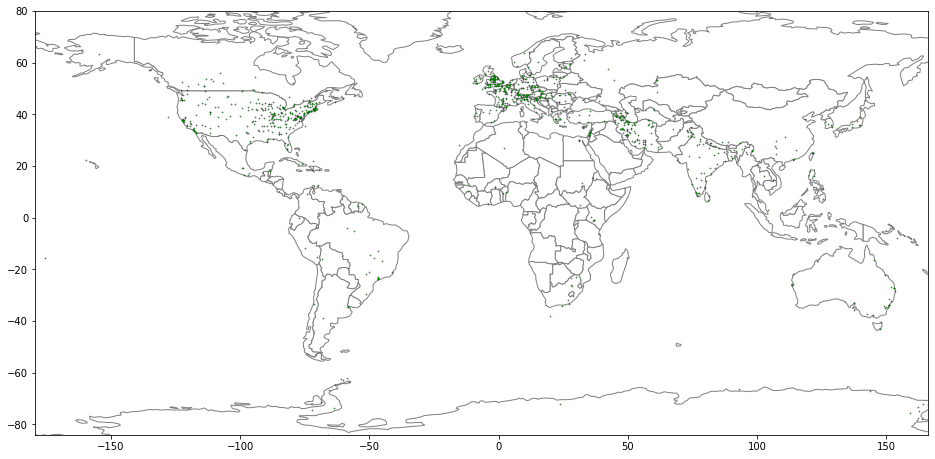

In [14]:
utils.map_gdf(gdf.sample(sample_size), alpha=0.01, markersize=1, c='g', 
              fname=scratch_folder/'sample_map.png')

In [15]:
took = time.time() - pipeline_start
if took < 60:
    print("pipeline took", round(took, 2), "seconds")
elif took < 3600:
    print("pipeline took", round(took/60, 2), "minutes")
else:
    print("pipeline took", round(took/60/60, 2), "hours")

pipeline took 8.97 seconds
